In [363]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [364]:
data = pd.read_table('steel_alloying.csv', sep=';', index_col=0, decimal=',')
data.head()

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,29.0,45.366667,24.400000,41.033333,NaN,0.456460,...,0.12,2.6,NaN,NaN,53.4,1.0,5.8,0.15,2.6,NaN
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,26.0,44.066667,13.866667,44.066667,NaN,0.359285,...,0.14,2.2,NaN,NaN,59.3,0.6,4.1,0.11,2.3,NaN
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,24.0,43.350000,17.950000,43.350000,NaN,0.331665,...,0.12,2.6,NaN,NaN,57.2,0.5,8.1,0.13,2.3,NaN
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,17.0,46.183333,19.816667,46.183333,NaN,0.377945,...,0.11,2.4,NaN,NaN,60.3,0.5,6.3,0.12,2.6,NaN
4,г683863<889,2070-06-21 03:50:00,Э76ХФ,Р65,20.0,48.500000,17.033333,48.500000,NaN,0.389875,...,0.12,2.4,NaN,NaN,60.3,0.6,4.5,0.09,2.5,NaN


In [365]:
data.shape

(7041, 84)

In [366]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7041 entries, 0 to 7040
Data columns (total 84 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   nplv                            7041 non-null   object 
 1   DT                              7041 non-null   object 
 2   МАРКА                           7041 non-null   object 
 3   ПРОФИЛЬ                         7041 non-null   object 
 4   t вып-обр                       6444 non-null   float64
 5   t обработка                     6440 non-null   float64
 6   t под током                     6440 non-null   float64
 7   t продувка                      6444 non-null   float64
 8   ПСН гр.                         5249 non-null   float64
 9   чист расход C                   6435 non-null   float64
 10  чист расход Cr                  5883 non-null   float64
 11  чист расход Mn                  6431 non-null   float64
 12  чист расход Si                  64

In [367]:
# data['ПРОФИЛЬ'].value_counts()

In [368]:
# data.columns

In [369]:
data.drop(['nplv', 'DT', 'ПРОФИЛЬ'], axis=1, inplace=True)
data.head()

,МАРКА,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,Э76ХФ,29.0,45.366667,24.400000,41.033333,NaN,0.456460,0.059572,0.117446,0.104762,...,0.12,2.6,NaN,NaN,53.4,1.0,5.8,0.15,2.6,NaN
1,Э76ХФ,26.0,44.066667,13.866667,44.066667,NaN,0.359285,0.083738,0.160923,0.110327,...,0.14,2.2,NaN,NaN,59.3,0.6,4.1,0.11,2.3,NaN
2,Э76ХФ,24.0,43.350000,17.950000,43.350000,NaN,0.331665,0.081490,0.132332,0.139860,...,0.12,2.6,NaN,NaN,57.2,0.5,8.1,0.13,2.3,NaN
3,Э76ХФ,17.0,46.183333,19.816667,46.183333,NaN,0.377945,0.133194,0.221605,0.165186,...,0.11,2.4,NaN,NaN,60.3,0.5,6.3,0.12,2.6,NaN
4,Э76ХФ,20.0,48.500000,17.033333,48.500000,NaN,0.389875,0.105094,0.169459,0.143024,...,0.12,2.4,NaN,NaN,60.3,0.6,4.5,0.09,2.5,NaN


In [370]:
data['МАРКА'].value_counts()

Э76ХФ     4953
Э90ХАФ    1384
Э73Ф       227
Э76Ф        86
Ш2.2        59
Э76         56
900А        54
R350HT      54
Э76ХАФ      50
R260        35
G2HH        34
Ш2Л         31
НХ           7
09Г2С        4
С345         3
С255         2
С355         1
Ст3сп        1
Name: МАРКА, dtype: int64

In [371]:
marka_dict = {'Э76ХФ': 'Э76ХФ', 'Э90ХАФ': 'Э90ХАФ', 'Э73Ф': 'Э73Ф', 'Э76Ф': 'Э76Ф', 'Ш2.2': 'Ш2.2', 'Э76': 'Э76',
              '900А': '900А', 'R350HT': 'R350HT', 'Э76ХАФ': 'Э76ХАФ', 'R260': 'R260', 'G2HH': 'G2HH', 'Ш2Л': 'Ш2Л',
              'НХ': 'Другие' , '09Г2С': 'Другие', 'С345': 'Другие', 'С255': 'Другие', 'С355': 'Другие', 'Ст3сп' : 'Другие'}
data['МАРКА'] = data['МАРКА'].map(marka_dict)   


In [372]:
data.iloc[:, 1:5].describe()

,t вып-обр,t обработка,t под током,t продувка
count,6444.000000,6440.000000,6440.000000,6444.000000
mean,26.492241,46.194099,21.010523,46.063051
std,14.842045,9.878727,4.758272,9.625492
min,-1.000000,4.350000,2.816667,4.350000
25%,14.000000,42.350000,18.033333,42.216667
50%,25.000000,44.683333,20.500000,44.550000
75%,37.000000,47.550000,23.300000,47.516667
max,98.000000,294.083333,67.583333,251.000000


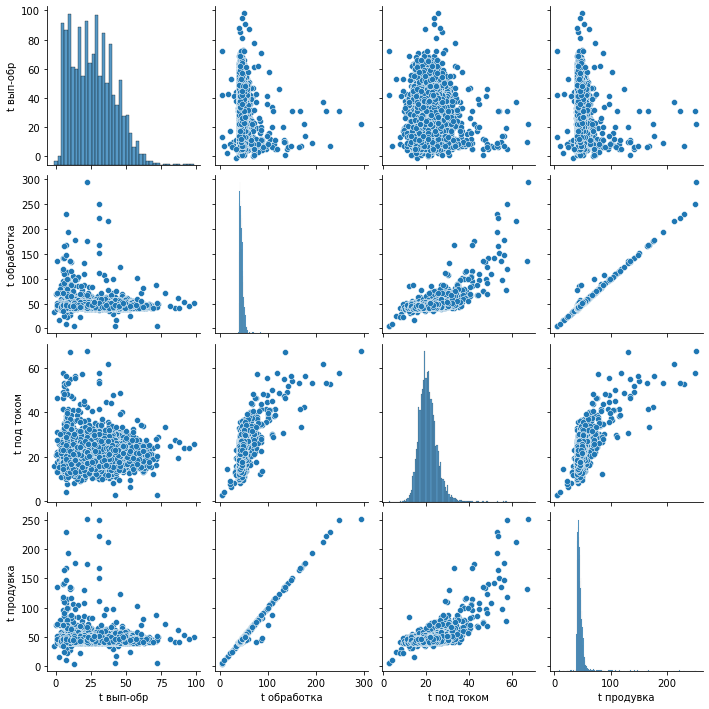

In [373]:
sns.pairplot(data.iloc[:, 1:5])

In [374]:
# pd.set_option('display.max_rows', None)
# pd.reset_option("display.max_rows")
null_values = pd.DataFrame({'кол-во пропуск' :data.iloc[:, 5:].isna().sum()})
null_values['per'] = (null_values.iloc[:, 0] * 100 / len(data)).apply(lambda x: round(x, 2))
null_values.value_counts().head(5) # количесвто колонок, в которых одинаковое кол-во пропусков

кол-во пропуск  per  
597             8.48     35
598             8.49      4
2299            32.65     4
601             8.54      2
605             8.59      2
dtype: int64

In [375]:
# Проверяем, что в 35 колонках, в которых отстутвует 597 значений, пропуски относятся к одним и тем же строкам.
empty_columns = data[null_values[null_values.per == 8.48].index].T.isna().sum() 
(empty_columns == 35).sum()

597

In [376]:
data[null_values[null_values.per == 8.48].index].columns
# в этих строках отутсвуют основные переменные, по которым мы анализуем наши данные (химшлак последний CaO, FeO, MnO, R)
# значит можем эти строки удалять

Index(['произв жидкая сталь', 'произв количество обработок',
       'произв  количество плавок', 'произв количество плавок (цел)',
       'химсталь первый Al_1', 'химсталь первый C_1', 'химсталь первый Cr_1',
       'химсталь первый Cu_1', 'химсталь первый Mn_1', 'химсталь первый Ni_1',
       'химсталь первый P_1', 'химсталь первый S_1', 'химсталь первый Si_1',
       'химсталь первый Ti_1', 'химсталь первый V_1', 'химсталь последний Al',
       'химсталь последний C', 'химсталь последний Cr',
       'химсталь последний Cu', 'химсталь последний Mn',
       'химсталь последний Mo', 'химсталь последний Ni',
       'химсталь последний P', 'химсталь последний S', 'химсталь последний Si',
       'химсталь последний Ti', 'химсталь последний V', 'химшлак первый CaO_1',
       'химшлак первый FeO_1', 'химшлак первый MnO_1', 'химшлак первый R_1',
       'химшлак последний CaO', 'химшлак последний FeO',
       'химшлак последний MnO', 'химшлак последний R'],
      dtype='object')

In [377]:
data.drop(empty_columns[empty_columns == 35].index, axis=0, inplace=True)
data.shape

(6444, 81)

In [378]:
def df_null_values(df):
    null_values = pd.DataFrame({'кол-во пропуск' :df.iloc[:, 5:].isna().sum()})
    null_values['per'] = (null_values.iloc[:, 0] * 100 / len(df)).apply(lambda x: round(x, 3))
    return null_values

In [379]:
null_values = df_null_values(data.iloc[:, 5:])
columns_sortby_nan = null_values.sort_values(by='per', ascending=False).index
null_values.sort_values(by='per', ascending=False).head(17)

,кол-во пропуск,per
ферспл FeSi-75,6439,99.922
сыпуч кокс. мелочь (сух.),6437,99.891
сыпуч кварцит,6431,99.798
ферспл FeMo,6411,99.488
ферспл Ni H1 пласт.,6362,98.727
ферспл FeV азот.,6061,94.056
расход C пров.,5720,88.765
ферспл ферванит,5427,84.218
N2 (интенс.),5055,78.445
расход газ N2,5055,78.445


In [380]:
#удалим колонки, в которых больше 70 % пропусков 
data.drop(null_values[null_values.per > 70].index, axis=1, inplace=True)

In [381]:
null_values = df_null_values(data.iloc[:, 5:])
columns_sortby_nan = null_values.sort_values(by='per', ascending=False).index
null_values.sort_values(by='per', ascending=False).head(7)

,кол-во пропуск,per
химшлак последний SiO2,1702,26.412
химшлак последний Al2O3,1702,26.412
химшлак первый SiO2_1,1702,26.412
химшлак первый Al2O3_1,1702,26.412
сыпуч известь РП,1674,25.978
ферспл фх850А,561,8.706
сыпуч шпат плав.,534,8.287


Для химшлаков SiO2 и Al2O3 неизветно 26 % процентов данных. Значит для этих целевых переменных выборка для обучения будет меньше. 

In [382]:
# проверка, что нет  данных по одним и тем же строчкам
(data['химшлак последний SiO2'].isna() == data['химшлак первый Al2O3_1'].isna()).sum()

6444

In [383]:
null_values[null_values.per == 0].count()
# для 35 колонок у нас известны все значения

кол-во пропуск    35
per               35
dtype: int64

In [384]:
data_with_nan = null_values[null_values.per != 0].sort_values('per', ascending = False).iloc[4:, :]
columns_with_nan = data_with_nan.index
data_with_nan

,кол-во пропуск,per
сыпуч известь РП,1674,25.978
ферспл фх850А,561,8.706
сыпуч шпат плав.,534,8.287
чист расход V,266,4.128
ферспл FeV-80,265,4.112
химсталь последний Ca,226,3.507
ферспл CaC2,200,3.104
сыпуч кокс. мелочь КМ1,137,2.126
ферспл SiMn18,46,0.714
ферспл Mn5Si65Al0.5,44,0.683


In [385]:
for name in columns_with_nan:
    if data[name].value_counts(dropna=False).count() < 10:
        print(data[name].value_counts(dropna=False))

0.02    6189
NaN      200
0.03      28
0.01       8
0.05       8
0.02       6
0.04       5
Name: ферспл CaC2, dtype: int64


CaC2 вещество. Можно предположить, что Nan значит отсутвие в сплаве данного вещества. Заменем Nan на 0.

In [386]:
data_initial = data.copy()
data['ферспл CaC2'] = data['ферспл CaC2'].apply(lambda x: round(x, 2))
data['ферспл CaC2'] = data['ферспл CaC2'].map({0.02 : 0.02, np.NAN: 0, 0.03 : 'Другие', 0.01: 'Другие', 0.05: 'Другие', 0.04: 'Другие'})
# print(data['ферспл CaC2'].value_counts(dropna=False))
data['ферспл CaC2'] = data['ферспл CaC2'].map({0.02 : 0.02, 0: 0, 'Другие': -1})
print(data['ферспл CaC2'].value_counts(dropna=False))
columns_with_nan = list(columns_with_nan).copy()
columns_with_nan.remove('ферспл CaC2')

0.02      6195
0          200
Другие      49
Name: ферспл CaC2, dtype: int64


In [399]:
columns_with_nan

['сыпуч известь РП',
 'ферспл  фх850А',
 'сыпуч  шпат плав.',
 'чист расход V',
 'ферспл  FeV-80',
 'химсталь последний Ca',
 'сыпуч  кокс. мелочь КМ1',
 'ферспл SiMn18',
 'ферспл  Mn5Si65Al0.5',
 'сыпуч кокс пыль УСТК',
 'расход газ Ar',
 'Ar (интенс.)',
 'температура первая',
 'температура последняя',
 'эл. энергия',
 'эл. энергия (интенс.)',
 'химсталь последний N',
 'химсталь первый Mo_1',
 'химшлак первый MgO_1',
 'химшлак последний MgO',
 'химсталь первый N_1']

In [387]:
data_for_SiO2_Al2O3 = data[ ~data['химшлак последний SiO2'].isna()].copy()
data_for_anothers = data.drop(['химшлак последний SiO2', 'химшлак первый Al2O3_1', 'химшлак последний Al2O3',
       'химшлак первый SiO2_1'], axis=1).copy()

In [388]:
null_values_Si_AL = df_null_values(data_for_SiO2_Al2O3.iloc[:, 5:])
columns_sortby_nan_Si_AL = null_values_Si_AL.sort_values(by='per', ascending=False).index
null_values_Si_AL.sort_values(by='per', ascending=False).head(7)

,кол-во пропуск,per
сыпуч известь РП,978,20.624
сыпуч шпат плав.,467,9.848
ферспл фх850А,418,8.815
чист расход V,175,3.690
ферспл FeV-80,174,3.669
химсталь последний Ca,166,3.501
сыпуч кокс. мелочь КМ1,81,1.708


In [389]:
null_values_anothers = df_null_values(data_for_anothers.iloc[:, 5:])
columns_sortby_nan_anothers = null_values_anothers.sort_values(by='per', ascending=False).index
null_values_anothers.sort_values(by='per', ascending=False).head(7)

,кол-во пропуск,per
сыпуч известь РП,1674,25.978
ферспл фх850А,561,8.706
сыпуч шпат плав.,534,8.287
чист расход V,266,4.128
ферспл FeV-80,265,4.112
химсталь последний Ca,226,3.507
сыпуч кокс. мелочь КМ1,137,2.126


In [390]:
def description(df, columns):
    for name in columns:
        print(name, '\nПропущенных значений:', df[name].isna().sum(),\
              '(', round(df[name].isna().sum() * 100 / len(df[name]), 2)  ,'%)',
             '\nМедиана: {2}, Среднее значение: {0}, Ср.откл:{1}'.format(round(df[name].mean(), 3),\
                                                                         round(df[name].std(), 3),\
                                                                         df[name].median()),\
              '\nУникальных значений: {}'.format(df[name].value_counts(dropna=False).count()), '\n')
        fig = plt.figure(figsize=(10, 8))
        plt.subplot(221)
        plt.hist(df[name])
        plt.grid()
        plt.subplot(222)
        sns.boxplot(y=df[name])
        plt.show()

In [391]:
corr_matrix = data.corr(method='spearman')

In [392]:
izv_rp = corr_matrix['сыпуч известь РП']
izv_rp[np.abs(izv_rp) > 0.3]

чист расход Si           0.362364
сыпуч известь РП         1.000000
ферспл  Mn5Si65Al0.5     0.310892
химсталь первый Si_1    -0.318224
химшлак первый MgO_1     0.320485
химшлак первый R_1      -0.418449
химшлак первый SiO2_1    0.310702
Name: сыпуч известь РП, dtype: float64

сыпуч известь РП 
Пропущенных значений: 1674 ( 25.98 %) 
Медиана: 0.11599999999999999, Среднее значение: 0.132, Ср.откл:0.08 
Уникальных значений: 442 



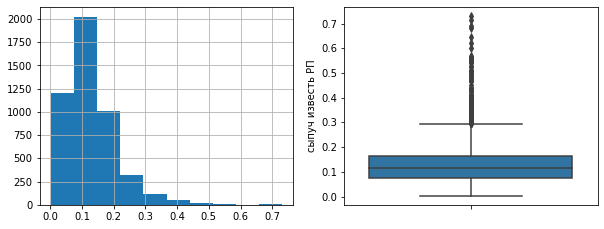

In [393]:
description(data, ['сыпуч известь РП'])

In [394]:
(data['сыпуч известь РП'] == 0).sum()

0

In [395]:
data['ln_сып_изв'] = np.log(data['сыпуч известь РП'])

ln_сып_изв 
Пропущенных значений: 1674 ( 25.98 %) 
Медиана: -2.1541650878757723, Среднее значение: -2.181, Ср.откл:0.566 
Уникальных значений: 429 



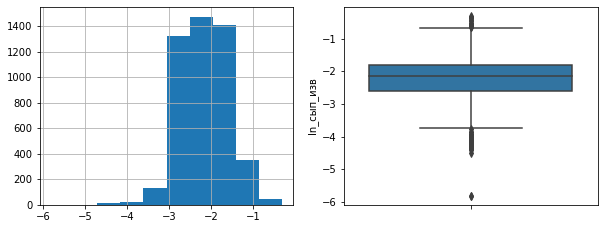

In [396]:
description(data, ['ln_сып_изв'] )

In [398]:
# удаление выбросов
out_forest = IsolationForest()
out_forest.fit(data[columns_with_nan])
outlier_predicted = out_forest.predict(data[columns_with_nan])